Source: [https://www.youtube.com/watch?v=YyOuDi-zSiI](https://www.youtube.com/watch?v=YyOuDi-zSiI)

In [1]:
# load eda packages
import pandas as pd
import numpy as np

In [2]:
# load data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, hamming_loss

In [4]:
# split dataset into train/test
from sklearn.model_selection import train_test_split
# feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# %pip install scikit-multilearn

In [6]:
# multi-label packages
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [7]:
# load sample dataset
df = pd.read_csv("data/so_dataset_2_tags.csv")
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [8]:
df.loc[0].title

'Flask-SQLAlchemy - When are the tables/databases created and destroyed?'

In [9]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [10]:
# convert to float
df['mysql'] = df['mysql'].astype(float)
df.dtypes

title      object
tags       object
mysql     float64
python    float64
php       float64
dtype: object

<AxesSubplot: xlabel='python', ylabel='count'>

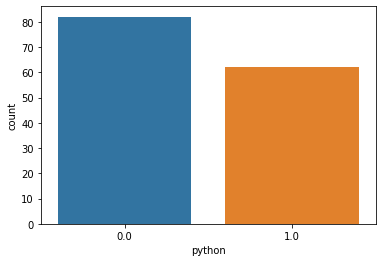

In [11]:
# value counts
sns.countplot(data=df, x='python')

<AxesSubplot: xlabel='php', ylabel='count'>

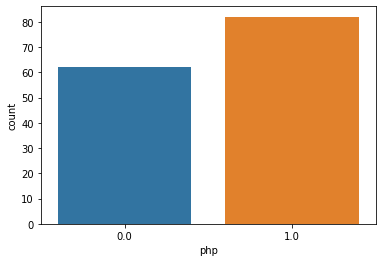

In [12]:
sns.countplot(data=df, x='php')

In [13]:
df['php'].value_counts()

1.0    82
0.0    62
Name: php, dtype: int64

<AxesSubplot: >

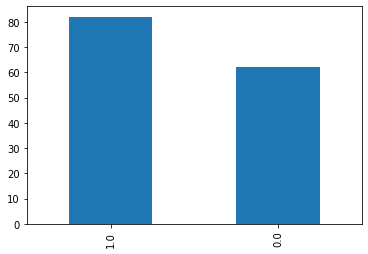

In [14]:
df['php'].value_counts().plot(kind='bar')

In [15]:
# %pip install neattext

In [16]:
# text preprocessing
# neattext: remove stopwords
# pip install neattext
import neattext as nt
import neattext.functions as nfx

In [17]:
# explore for noise
df['title'].apply(lambda x: nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [18]:
# extracts the stopwords
df['title'].apply(lambda x: nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [19]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
# removes the stopwords
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [21]:
corpus = df['title'].apply(nfx.remove_stopwords)

In [22]:
# feature engineering
# build features from our text
# TFIDF, countvectorizer, bag of words (bow)

In [23]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [24]:
# build features
Xfeatures = tfidf.fit_transform(corpus).toarray()
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1.0,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1.0,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1.0,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1.0,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1.0,0.0,1.0


In [26]:
df.columns

Index(['title', 'tags', 'mysql', 'python', 'php'], dtype='object')

In [27]:
y = df[['mysql', 'python', 'php']]

In [28]:
# split data
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, y, test_size=0.3, random_state=42)

In [29]:
print(df['title'].shape)
print(X_train.shape)

(144,)
(100, 404)


# BUILDING OUR MODEL ⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠⚠

In [30]:
# building our model
# estimator + multilabel estimators

In [31]:
# problem transform
import skmultilearn
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

##### binary relevance

In [32]:
# convert our multilabel problem to a multiclass
# binary classification
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [33]:
binary_rel_clf.fit(X_train, y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [34]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [35]:
br_prediction

<44x3 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Column format>

In [36]:
# convert to array
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [37]:
 # accuracy
accuracy_score(y_test,br_prediction)

0.9090909090909091

In [38]:
# hamming loss : incorrect predictions
# lower result the better
hamming_loss(y_test,br_prediction)

0.06060606060606061

#### classifer chain

In [39]:
# function for model
def build_model(model, mlb_estimator, xtrain, ytrain, xtest, ytest):
    
    # create an instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)

    # predict
    clf_predictions = clf.predict(xtest)

    # check for accuracy
    acc = accuracy_score(ytest, clf_predictions)
    ham = hamming_loss(ytest, clf_predictions)
    result = {'accuracy': acc, 'hamming_score': ham}

    return result

In [42]:
# classifier chains
# preserve label correlation
clf_chain_model = build_model(MultinomialNB(), ClassifierChain, X_train, y_train, X_test, y_test)
clf_chain_model

{'accuracy': 0.8409090909090909, 'hamming_score': 0.10606060606060606}

##### label powerset

In [43]:
# label powerset
clf_label_powerset = build_model(MultinomialNB(), LabelPowerset, X_train, y_train, X_test, y_test)
clf_label_powerset

{'accuracy': 0.9090909090909091, 'hamming_score': 0.06060606060606061}

## Apply on a simple title/question

In [46]:
ex1 = df['title'].iloc[0] # we know this is python+sql

In [48]:
# vectorized
vec_example = tfidf.transform([ex1])

In [49]:
# make our predictions
binary_rel_clf.predict(vec_example).toarray()

array([[1., 1., 0.]])

In [50]:
### Adapted Algorithm
from skmultilearn.adapt import MLkNN

In [51]:
mlknn = MLkNN()
mlknn.fit(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute 'getformat'